<a href="https://colab.research.google.com/github/milamarcheva/morphemic_tokenisation/blob/main/bg_cds_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [11]:
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import string
import sys
import nltk
from ast import literal_eval
from nltk.tree import *
import time

In [12]:
import math

In [13]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


uncomment if you need to read in more data

In [14]:
# !pip install --upgrade pylangacq
# import pylangacq

In [15]:
!pip install morfessor

###DF all utterances read in and CDS stats

In [ ]:
df = pd.read_csv(r'drive/My Drive/Colab Notebooks/LabLing_longitudinal_all_utterances.csv')
df_tales = pd.read_csv(r'drive/My Drive/Colab Notebooks/bg_tales.csv')

In [ ]:
df_cds = df[df.Name != df.Participant][df.UttLen!=0].reset_index()

<ipython-input-12-715866f9dc2b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cds = df[df.Name != df.Participant][df.UttLen!=0].reset_index()


In [ ]:
df_cds

,index,Name,Age,Participant,Utterance,TokenisedUtt,TokenisedUttLower,TokenisedUttNoPunct,UttLen
0,0,ALE,1;01.29,VEL,"sashe, na kolko si godinki ?","['sashe', ',', 'na', 'kolko', 'si', 'godinki',...","['sashe', ',', 'na', 'kolko', 'si', 'godinki',...","['sashe', 'na', 'kolko', 'si', 'godinki']",5
1,2,ALE,1;01.29,VEL,pri mama li iskash ?,"['pri', 'mama', 'li', 'iskash', '?']","['pri', 'mama', 'li', 'iskash', '?']","['pri', 'mama', 'li', 'iskash']",4
2,4,ALE,1;01.29,VEL,kakvo ima ej tam ?,"['kakvo', 'ima', 'ej', 'tam', '?']","['kakvo', 'ima', 'ej', 'tam', '?']","['kakvo', 'ima', 'ej', 'tam']",4
3,6,ALE,1;01.29,VEL,mashinka ?,"['mashinka', '?']","['mashinka', '?']",['mashinka'],1
4,7,ALE,1;01.29,VEL,"kakvo ima tam, mamo ?","['kakvo', 'ima', 'tam', ',', 'mamo', '?']","['kakvo', 'ima', 'tam', ',', 'mamo', '?']","['kakvo', 'ima', 'tam', 'mamo']",4
...,...,...,...,...,...,...,...,...,...
24927,44945,TEF,2;05.25,BAB,byrzo na gyrneto !,"['byrzo', 'na', 'gyrneto', '!']","['byrzo', 'na', 'gyrneto', '!']","['byrzo', 'na', 'gyrneto']",3
24928,44948,TEF,2;05.25,BAB,digaj gashtite !,"['digaj', 'gashtite', '!']","['digaj', 'gashtite', '!']","['digaj', 'gashtite']",2
24929,44951,TEF,2;05.25,BAB,"Ela, babo !","['Ela', ',', 'babo', '!']","['ela', ',', 'babo', '!']","['ela', 'babo']",2
24930,44953,TEF,2;05.25,BAB,gotova li si ?,"['gotova', 'li', 'si', '?']","['gotova', 'li', 'si', '?']","['gotova', 'li', 'si']",3


In [ ]:
df_cds[df_cds.UttLen==0]

,index,Name,Age,Participant,Utterance,TokenisedUtt,TokenisedUttLower,TokenisedUttNoPunct,UttLen


In [ ]:
df_cds[df_cds.UttLen!=0][df_cds.UttLen!=1]

,index,Name,Age,Participant,Utterance,TokenisedUtt,TokenisedUttLower,TokenisedUttNoPunct,UttLen
0,0,ALE,1;01.29,VEL,"sashe, na kolko si godinki ?","['sashe', ',', 'na', 'kolko', 'si', 'godinki',...","['sashe', ',', 'na', 'kolko', 'si', 'godinki',...","['sashe', 'na', 'kolko', 'si', 'godinki']",5
1,2,ALE,1;01.29,VEL,pri mama li iskash ?,"['pri', 'mama', 'li', 'iskash', '?']","['pri', 'mama', 'li', 'iskash', '?']","['pri', 'mama', 'li', 'iskash']",4
2,4,ALE,1;01.29,VEL,kakvo ima ej tam ?,"['kakvo', 'ima', 'ej', 'tam', '?']","['kakvo', 'ima', 'ej', 'tam', '?']","['kakvo', 'ima', 'ej', 'tam']",4
4,7,ALE,1;01.29,VEL,"kakvo ima tam, mamo ?","['kakvo', 'ima', 'tam', ',', 'mamo', '?']","['kakvo', 'ima', 'tam', ',', 'mamo', '?']","['kakvo', 'ima', 'tam', 'mamo']",4
5,9,ALE,1;01.29,VEL,da ti go dadem ?,"['da', 'ti', 'go', 'dadem', '?']","['da', 'ti', 'go', 'dadem', '?']","['da', 'ti', 'go', 'dadem']",4
...,...,...,...,...,...,...,...,...,...
24927,44945,TEF,2;05.25,BAB,byrzo na gyrneto !,"['byrzo', 'na', 'gyrneto', '!']","['byrzo', 'na', 'gyrneto', '!']","['byrzo', 'na', 'gyrneto']",3
24928,44948,TEF,2;05.25,BAB,digaj gashtite !,"['digaj', 'gashtite', '!']","['digaj', 'gashtite', '!']","['digaj', 'gashtite']",2
24929,44951,TEF,2;05.25,BAB,"Ela, babo !","['Ela', ',', 'babo', '!']","['ela', ',', 'babo', '!']","['ela', 'babo']",2
24930,44953,TEF,2;05.25,BAB,gotova li si ?,"['gotova', 'li', 'si', '?']","['gotova', 'li', 'si', '?']","['gotova', 'li', 'si']",3


In [ ]:
df_cds[df_cds.UttLen!=0][df_cds.UttLen!=1].UttLen.sum()

np.int64(90645)

In [ ]:
df_cds[df_cds.UttLen!=0][df_cds.UttLen!=1].UttLen.sum()

In [ ]:
df_cds.UttLen.sum()

np.int64(94705)

In [ ]:
df_cds.UttLen.describe()

,UttLen
count,24932.000000
mean,3.798532
std,2.335323
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,25.000000


<Axes: >

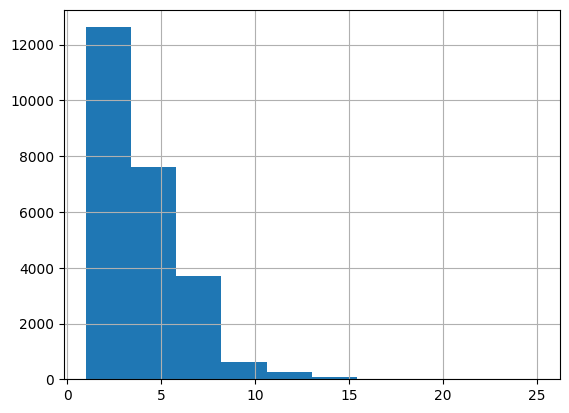

In [ ]:
df_cds.UttLen.hist()

### Morfessor work

In [ ]:
import morfessor

# Create a new Morfessor model
model = morfessor.BaselineModel()

In [ ]:
words = [word for utt in df_cds["TokenisedUttNoPunct"] for word in literal_eval(utt)]  # Convert string lists to actual lists

# Save words to a text file (required by Morfessor)
with open("drive/My Drive/Colab Notebooks/bulgarian_cds_words.txt", "w", encoding="utf-8") as f:
    for word in words:
        f.write(word + "\n")


In [ ]:
io = morfessor.MorfessorIO()
train_data = list(io.read_corpus_file("drive/My Drive/Colab Notebooks/bulgarian_cds_words.txt"))

In [ ]:
model_types = morfessor.BaselineModel()
model_logtokens = morfessor.BaselineModel()
model_tokens = morfessor.BaselineModel()

model_types.load_data(train_data, count_modifier=lambda x: 1)
def log_func(x):
    return int(round(math.log(x + 1, 2)))
model_logtokens.load_data(train_data, count_modifier=log_func)
model_tokens.load_data(train_data)

models = [model_types, model_logtokens, model_tokens]

for model in models:
    model.train_batch()

100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (7795 of 7795) |####################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (7795 of 7795) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (7795 of 7795) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (7795 of 7795) |###################

In [ ]:
# Function to segment an utterance
def segment_utterance(utterance, model):
    words = literal_eval(utterance)  # Convert string list to actual list
    segmented = ["-".join(model.viterbi_segment(word)[0]) for word in words]
    return segmented

# Apply segmentation to the whole dataset
df_cds["MorfessorSegmentedTypes"] = df_cds["TokenisedUttNoPunct"].apply(segment_utterance, model = model_types)
df_cds["MorfessorSegmentedLogtokens"] = df_cds["TokenisedUttNoPunct"].apply(segment_utterance, model = model_logtokens)
df_cds["MorfessorSegmentedTokens"] = df_cds["TokenisedUttNoPunct"].apply(segment_utterance, model = model_tokens)


In [ ]:
df_cds

,index,Name,Age,Participant,Utterance,TokenisedUtt,TokenisedUttLower,TokenisedUttNoPunct,UttLen,MorfessorSegmentedTypes,MorfessorSegmentedLogtokens,MorfessorSegmentedTokens
0,0,ALE,1;01.29,VEL,"sashe, na kolko si godinki ?","['sashe', ',', 'na', 'kolko', 'si', 'godinki',...","['sashe', ',', 'na', 'kolko', 'si', 'godinki',...","['sashe', 'na', 'kolko', 'si', 'godinki']",5,"[sashe, na, kol-ko, si, godi-nki]","[sashe, na, kolko, si, godinki]","[sashe, na, kolko, si, godinki]"
1,2,ALE,1;01.29,VEL,pri mama li iskash ?,"['pri', 'mama', 'li', 'iskash', '?']","['pri', 'mama', 'li', 'iskash', '?']","['pri', 'mama', 'li', 'iskash']",4,"[pri, mama, li, iskash]","[pri, mama, li, iskash]","[pri, mama, li, iskash]"
2,4,ALE,1;01.29,VEL,kakvo ima ej tam ?,"['kakvo', 'ima', 'ej', 'tam', '?']","['kakvo', 'ima', 'ej', 'tam', '?']","['kakvo', 'ima', 'ej', 'tam']",4,"[kakvo, ima, e-j, ta-m]","[kakvo, ima, ej, ta-m]","[kakvo, ima, ej, tam]"
3,6,ALE,1;01.29,VEL,mashinka ?,"['mashinka', '?']","['mashinka', '?']",['mashinka'],1,[mashin-ka],[mashinka],[mashinka]
4,7,ALE,1;01.29,VEL,"kakvo ima tam, mamo ?","['kakvo', 'ima', 'tam', ',', 'mamo', '?']","['kakvo', 'ima', 'tam', ',', 'mamo', '?']","['kakvo', 'ima', 'tam', 'mamo']",4,"[kakvo, ima, ta-m, mamo]","[kakvo, ima, ta-m, mamo]","[kakvo, ima, tam, mamo]"
...,...,...,...,...,...,...,...,...,...,...,...,...
24927,44945,TEF,2;05.25,BAB,byrzo na gyrneto !,"['byrzo', 'na', 'gyrneto', '!']","['byrzo', 'na', 'gyrneto', '!']","['byrzo', 'na', 'gyrneto']",3,"[byr-z-o, na, gyr-ne-to]","[byrzo, na, gyrne-to]","[byrzo, na, gyrneto]"
24928,44948,TEF,2;05.25,BAB,digaj gashtite !,"['digaj', 'gashtite', '!']","['digaj', 'gashtite', '!']","['digaj', 'gashtite']",2,"[dig-aj, gashti-te]","[digaj, gashti-te]","[digaj, gashtite]"
24929,44951,TEF,2;05.25,BAB,"Ela, babo !","['Ela', ',', 'babo', '!']","['ela', ',', 'babo', '!']","['ela', 'babo']",2,"[e-la, bab-o]","[ela, babo]","[ela, babo]"
24930,44953,TEF,2;05.25,BAB,gotova li si ?,"['gotova', 'li', 'si', '?']","['gotova', 'li', 'si', '?']","['gotova', 'li', 'si']",3,"[gotov-a, li, si]","[gotov-a, li, si]","[go-tova, li, si]"


In [ ]:
df_cds_morfessor = pd.read_csv(r'drive/My Drive/Colab Notebooks/LabLing_longitudinal_cds_morfessor.csv')

In [ ]:
df_cds.to_csv(r'drive/My Drive/Colab Notebooks/LabLing_longitudinal_cds_morfessor.csv', index=False)

### CDS further work

###First time reading in

In [ ]:
reader = pylangacq.read_chat(r'drive/My Drive/Colab Notebooks/LabLing/longitudinal/')

In [ ]:
reader.info(verbose=True)

In [ ]:
reader.headers()[3]

{'UTF8': '',
 'PID': '11312/a-00034766-1',
 'Languages': ['bul'],
 'Participants': {'ALE': {'name': 'Target_Child',
   'language': 'bul',
   'corpus': 'LabLing',
   'age': '1;06.21',
   'sex': '',
   'group': '',
   'ses': '',
   'role': 'Target_Child',
   'education': '',
   'custom': ''},
  'VEL': {'name': 'Mother',
   'language': 'bul',
   'corpus': 'LabLing',
   'age': '',
   'sex': '',
   'group': '',
   'ses': '',
   'role': 'Mother',
   'education': '',
   'custom': ''}},
 'Date': {datetime.date(1990, 8, 19)},
 'Tape Location': 'Cassete 3: Side 1 and Side 2',
 'Types': 'long, toyplay, TD'}

In [ ]:
reader.utterances()[:5]

[Utterance(participant='VEL', tokens=[Token(word='sashe', pos=None, mor=None, gra=None), Token(word=',', pos=None, mor=None, gra=None), Token(word='na', pos=None, mor=None, gra=None), Token(word='kolko', pos=None, mor=None, gra=None), Token(word='si', pos=None, mor=None, gra=None), Token(word='godinki', pos=None, mor=None, gra=None), Token(word='?', pos=None, mor=None, gra=None)], time_marks=None, tiers={'VEL': 'sashe, na kolko si godinki ?'}),
 Utterance(participant='ALE', tokens=[Token(word='mama', pos=None, mor=None, gra=None), Token(word=',', pos=None, mor=None, gra=None), Token(word='mama', pos=None, mor=None, gra=None), Token(word='!', pos=None, mor=None, gra=None)], time_marks=None, tiers={'ALE': 'mama, mama !'}),
 Utterance(participant='VEL', tokens=[Token(word='pri', pos=None, mor=None, gra=None), Token(word='mama', pos=None, mor=None, gra=None), Token(word='li', pos=None, mor=None, gra=None), Token(word='iskash', pos=None, mor=None, gra=None), Token(word='?', pos=None, mor=No

In [ ]:
[token.word for token in reader.utterances()[5].tokens]

['ej', '!']

In [ ]:
reader.utterances()[5].participant

'ALE'

In [ ]:
reader.utterances()[5].tiers[reader.utterances()[5].participant]

'ej !'

In [ ]:
all_utterances = reader.utterances(by_files=True)

In [ ]:
all_headers = reader.headers()

In [ ]:
child_abbrevs = []
child_ages = []
tokenised_list = []
utterances_list = []
participants_list = []

for i, file_path in enumerate(reader.file_paths()):
  child_abbrev = os.path.basename(os.path.dirname(file_path)).upper()
  child_age = all_headers[i]['Participants'][child_abbrev]['age']

  utterances_for_file = all_utterances[i]
  participants_for_file =  [u.participant for u in utterances_for_file]
  tokenised_utterances_for_file = [[token.word for token in u.tokens] for u in utterances_for_file]
  nontokenised_utterances_for_file = [u.tiers[p] for (u,p) in zip(utterances_for_file, participants_for_file)]


  child_abbrevs += [child_abbrev]*len(utterances_for_file)
  child_ages += [child_age]*len(utterances_for_file)
  tokenised_list += tokenised_utterances_for_file
  utterances_list += nontokenised_utterances_for_file
  participants_list += participants_for_file

In [ ]:
len(child_abbrevs)

44958

In [ ]:
tokenised_lower = [[t.lower() for t in tl] for tl in tokenised_list]

In [ ]:
tokenised_nopunct = [[t for t in tl if t not in string.punctuation] for tl in tokenised_lower]

In [ ]:
utt_len = [len(tn) for tn in tokenised_nopunct]

In [ ]:
df = pd.DataFrame({
    "Name": child_abbrevs, "Age": child_ages, "Participant": participants_list,
    "Utterance": utterances_list, "TokenisedUtt": tokenised_list,
    "TokenisedUttLower": tokenised_lower,
    "TokenisedUttNoPunct": tokenised_nopunct, "UttLen": utt_len})

In [ ]:
df_cds = df[df.Name != df.Participant]

In [ ]:
df_cds

,Name,Age,Participant,Utterance,TokenisedUtt,TokenisedUttLower,TokenisedUttNoPunct,UttLen
0,ALE,1;01.29,VEL,"sashe, na kolko si godinki ?","[sashe, ,, na, kolko, si, godinki, ?]","[sashe, ,, na, kolko, si, godinki, ?]","[sashe, na, kolko, si, godinki]",5
2,ALE,1;01.29,VEL,pri mama li iskash ?,"[pri, mama, li, iskash, ?]","[pri, mama, li, iskash, ?]","[pri, mama, li, iskash]",4
4,ALE,1;01.29,VEL,kakvo ima ej tam ?,"[kakvo, ima, ej, tam, ?]","[kakvo, ima, ej, tam, ?]","[kakvo, ima, ej, tam]",4
6,ALE,1;01.29,VEL,mashinka ?,"[mashinka, ?]","[mashinka, ?]",[mashinka],1
7,ALE,1;01.29,VEL,"kakvo ima tam, mamo ?","[kakvo, ima, tam, ,, mamo, ?]","[kakvo, ima, tam, ,, mamo, ?]","[kakvo, ima, tam, mamo]",4
...,...,...,...,...,...,...,...,...
44945,TEF,2;05.25,BAB,byrzo na gyrneto !,"[byrzo, na, gyrneto, !]","[byrzo, na, gyrneto, !]","[byrzo, na, gyrneto]",3
44948,TEF,2;05.25,BAB,digaj gashtite !,"[digaj, gashtite, !]","[digaj, gashtite, !]","[digaj, gashtite]",2
44951,TEF,2;05.25,BAB,"Ela, babo !","[Ela, ,, babo, !]","[ela, ,, babo, !]","[ela, babo]",2
44953,TEF,2;05.25,BAB,gotova li si ?,"[gotova, li, si, ?]","[gotova, li, si, ?]","[gotova, li, si]",3


In [ ]:
df

,Name,Age,Participant,Utterance,TokenisedUtt,TokenisedUttLower,TokenisedUttNoPunct,UttLen
0,ALE,1;01.29,VEL,"sashe, na kolko si godinki ?","[sashe, ,, na, kolko, si, godinki, ?]","[sashe, ,, na, kolko, si, godinki, ?]","[sashe, na, kolko, si, godinki]",5
1,ALE,1;01.29,ALE,"mama, mama !","[mama, ,, mama, !]","[mama, ,, mama, !]","[mama, mama]",2
2,ALE,1;01.29,VEL,pri mama li iskash ?,"[pri, mama, li, iskash, ?]","[pri, mama, li, iskash, ?]","[pri, mama, li, iskash]",4
3,ALE,1;01.29,ALE,ej tam !,"[ej, tam, !]","[ej, tam, !]","[ej, tam]",2
4,ALE,1;01.29,VEL,kakvo ima ej tam ?,"[kakvo, ima, ej, tam, ?]","[kakvo, ima, ej, tam, ?]","[kakvo, ima, ej, tam]",4
...,...,...,...,...,...,...,...,...
44953,TEF,2;05.25,BAB,gotova li si ?,"[gotova, li, si, ?]","[gotova, li, si, ?]","[gotova, li, si]",3
44954,TEF,2;05.25,TEF,az ne gotova .,"[az, ne, gotova, .]","[az, ne, gotova, .]","[az, ne, gotova]",3
44955,TEF,2;05.25,TEF,tivam si [: otivam si] .,"[tivam, otivam, si, .]","[tivam, otivam, si, .]","[tivam, otivam, si]",3
44956,TEF,2;05.25,VEL,kyde si otivash ?,"[kyde, si, otivash, ?]","[kyde, si, otivash, ?]","[kyde, si, otivash]",3


In [ ]:
df.to_csv(r'drive/My Drive/Colab Notebooks/LabLing_longitudinal_all_utterances.csv', index=False)

### web scraping

In [ ]:
!pip install requests html5lib
!pip install bs4

In [ ]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [ ]:
url = r"https://seedsoftellers.eu/bg/%D0%BF%D1%80%D0%B8%D0%BA%D0%B0%D0%B7%D0%BA%D0%B8/"

data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
links = []
for div in soup.find_all('div', class_='fwpl-result'):
    for link in div.find_all('a', href=True):
        links.append(link.get('href'))


In [ ]:
titles = []
resumes = []
mains = []
for link in links:
  data  = requests.get(link).text
  soup = BeautifulSoup(data,"html5lib")

  title = soup.find('h1').text
  resume = soup.find('strong').text
  main_text_divs = soup.find_all('div', class_='et_pb_post_content')
  main_text = ''

  for d in main_text_divs:
    main_text+=d.text

  cleaned_text = re.sub(r'\s+', ' ', main_text).strip()




  # text_inner = [ti.get("p") for ti in soup.find_all('div', class_='et_pb_text_inner')]
  # print(f"title:{title}, \nresume: {resume},")
  # print(cleaned_text)
  titles.append(title)
  resumes.append(resume)
  mains.append(cleaned_text)


        # \n main text{main_text}")

In [ ]:
titles

['Лаком-дол',
 'Магарешки съвет',
 'Бъдни вечер',
 'Най-хубавото птиче',
 'Деветият брат\u202f',
 'От вар момиче',
 'Безценното камъче',
 'Напатила се пата',
 'Лазарска песен',
 'Който прави добро, добро намира',
 'Мързелана Гана',
 'Ленивата невяста',
 'Кой каквото прави – на себе си го прави',
 'Приказка за бъчвата',
 'Ракът и неговите синове',
 'Дядовата ръкавичка',
 'Хитър Петър и чорбаджията',
 'Момчето и вятърът',
 'Великден',
 'Трици и халва',
 'Твърдушка, Мекушка и Сладушка',
 'Косе Босе',
 'Ключ за алчността',
 'Слепият змей',
 'Големи лъжи',
 'Неродена мома',
 'Дядо и ряпа',
 'Болен здрав носи',
 'Портрет на Ян Бибиян',
 'Който не работи, не трябва да яде',
 'Царят с магарешките уши',
 'Хитър Петър и змеят',
 'Хитър Петър и лъжите',
 'Хитър Петър и неговата сянка',
 'Мечката и лошата дума',
 'Старите хора',
 'Човешката алчност и завист',
 'Легенди за нестинарите',
 'Кума Лиса и Ежко Бежко',
 'Колата в локвата',
 'Торбата с шегите',
 'Хитър Петър подиграва алчния владика',
 'С

In [ ]:
df_tales = pd.DataFrame({
    "Title": titles, "Resume": resumes, "Main text": mains, "Link": links})

In [ ]:
df_tales

In [ ]:
df_tales.to_csv(r'drive/My Drive/Colab Notebooks/bg_tales.csv', index=False)

### BG tales tokenisation

In [19]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import string

text = "България е красива страна с богата история."
tokens = word_tokenize(text)

tokens = [t for t in tokens if (t not in string.punctuation) and (not t.isascii())]  # Remove punctuation

print(tokens)


text = "България е красива страна. Тя има богата история и култура."

sentences = sent_tokenize(text)

print(sentences)

['България', 'е', 'красива', 'страна', 'с', 'богата', 'история']
['България е красива страна.', 'Тя има богата история и култура.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
df_tales = pd.read_csv(r'drive/My Drive/Colab Notebooks/bg_tales.csv')

In [21]:
df_tales= df_tales.drop(7).reset_index(drop=True)

In [22]:
df_tales["MainSetencised"] = [sent_tokenize(text) for text in df_tales["Main text"]]

In [23]:
bg_punct = string.punctuation
bg_punct+='—'
bg_punct+='…'
bg_punct+='„'
bg_punct+='“'
bg_punct+='.'
bg_punct+='—'
bg_punct+=','


def tokenise_bg(sent):
  tokens = word_tokenize(sent)
  tokens = [t.lower() for t in tokens if (t not in bg_punct) and (not t.isascii())]
  return tokens

def tokenise_bg_list(sents):
  tokenised_sents = []
  for s in sents:
    ts = tokenise_bg(s)
    # print(ts)
    tokenised_sents.append(ts)

  return tokenised_sents

In [24]:
df_tales["MainSentencesTokenised"] = df_tales["MainSetencised"].apply(tokenise_bg_list)

In [25]:
# df_tales["MainLenghts"] = [len(s) for l in df_tales["MainSentencesTokenised"] for s in l]
df_tales["MainLengths"] = [[len(sentence) for sentence in sentences] for sentences in df_tales["MainSentencesTokenised"]]

# [word for sentence in text for word in sentence]

In [26]:
# Flatten the list to get all sentence lengths in one list
all_sentence_lengths = [length for sublist in df_tales["MainLengths"] for length in sublist]

# Calculate statistics
total_sentences = len(all_sentence_lengths)   # Total number of sentences
total_tokens = sum(all_sentence_lengths)      # Total number of tokens
avg_sentence_length = np.mean(all_sentence_lengths)  # Average sentence length

# Print results
print(f"Total sentences: {total_sentences}")
print(f"Total tokens: {total_tokens}")
print(f"Average sentence length: {avg_sentence_length:.2f}")

Total sentences: 2853
Total tokens: 29384
Average sentence length: 10.30


In [27]:
df_tales

,Title,Resume,Main text,Link,MainSetencised,MainSentencesTokenised,MainLengths
0,Дядо и ряпа,"Резюме: Посадил дядо ряпа. Расла, порасла, ста...",Дядо белобради ряпа взе да вади. С две ръце я ...,https://seedsoftellers.eu/bg/resources/%d0%b4%...,"[Дядо белобради ряпа взе да вади., С две ръце ...","[[дядо, белобради, ряпа, взе, да, вади], [с, д...","[6, 15, 3, 6, 8, 3, 5, 9, 3, 6, 8, 3, 7, 8, 5,..."
1,"Който не работи, не трябва да яде","Резюме: Народната приказка, която учи децата н...","Когато Галинка се зажени, нейната майка заръчв...",https://seedsoftellers.eu/bg/resources/%d0%ba%...,"[Когато Галинка се зажени, нейната майка заръч...","[[когато, галинка, се, зажени, нейната, майка,...","[23, 17, 22, 14, 8, 10, 9, 21, 11, 4, 7, 21, 2..."
2,Безценното камъче,Резюме: Един овчар спасил от огъня в гората гу...,Дядо Павел бил овчар. Имал си кошара в Балкана...,https://seedsoftellers.eu/bg/resources/%d0%b1%...,"[Дядо Павел бил овчар., Имал си кошара в Балка...","[[дядо, павел, бил, овчар], [имал, си, кошара,...","[4, 12, 16, 13, 22, 27, 16, 14, 4, 16, 16, 18,..."
3,Колата в локвата,Резюме: Един старец натоварил каруцата си и тр...,"Един селянин натоварил колата си с жито, прекр...",https://seedsoftellers.eu/bg/resources/%d0%ba%...,"[Един селянин натоварил колата си с жито, прек...","[[един, селянин, натоварил, колата, си, с, жит...","[15, 13, 13, 18, 7, 16, 15, 10, 5, 16, 10, 6, ..."
4,Големи лъжи,Резюме: В приказката се разказва за двама брат...,"Върви лъжец от село на село, та лъже, върви бр...",https://seedsoftellers.eu/bg/resources/%d0%b3%...,"[Върви лъжец от село на село, та лъже, върви б...","[[върви, лъжец, от, село, на, село, та, лъже, ...","[17, 1, 14, 8, 1, 4, 10, 1, 4, 20, 5, 1, 9, 17..."
5,Майчина сълза,Резюме: Това е история за силата на майчината ...,Заромоля дребен есенен дъждец. Жълтият листак ...,https://seedsoftellers.eu/bg/resources/%d0%bc%...,"[Заромоля дребен есенен дъждец., Жълтият листа...","[[заромоля, дребен, есенен, дъждец], [жълтият,...","[4, 5, 13, 10, 14, 3, 6, 7, 8, 15, 14, 21, 5, ..."
6,Дарените години,Резюме: В приказката човекът помага на животни...,"През един суров зимен ден, когато дърво и камъ...",https://seedsoftellers.eu/bg/resources/%d0%b4%...,"[През един суров зимен ден, когато дърво и кам...","[[през, един, суров, зимен, ден, когато, дърво...","[25, 3, 3, 6, 3, 13, 10, 8, 13, 3, 29, 3, 16, ..."
7,Старите хора,Резюме: Един цар наредил да бъдат погубени вси...,Един жесток цар изкарал закон да бъдат погубен...,https://seedsoftellers.eu/bg/resources/%d1%81%...,[Един жесток цар изкарал закон да бъдат погубе...,"[[един, жесток, цар, изкарал, закон, да, бъдат...","[11, 16, 7, 5, 4, 6, 8, 24, 11, 12, 6, 18, 3, ..."
8,Хитър Петър подиграва алчния владика,Резюме: Хитър Петър решил да даде урок на един...,"Имало едно време един толкова алчен владика, ч...",https://seedsoftellers.eu/bg/resources/%d1%85%...,"[Имало едно време един толкова алчен владика, ...","[[имало, едно, време, един, толкова, алчен, вл...","[14, 9, 15, 12, 7, 5, 6, 12, 18, 14, 5, 26, 11..."
9,Момчето и вятърът,Резюме: В приказката се разказва за упоритостт...,"Една вдовица имала едничък син. И майката, и м...",https://seedsoftellers.eu/bg/resources/%d0%bc%...,"[Една вдовица имала едничък син., И майката, и...","[[една, вдовица, имала, едничък, син], [и, май...","[5, 12, 9, 3, 3, 4, 2, 3, 9, 3, 6, 3, 3, 2, 3,..."


In [28]:
df_tales.to_csv(r'drive/My Drive/Colab Notebooks/bg_tales.csv', index=False)

### BG Books

from here: https://chitanka.info/collections/school/ii-class

In [16]:
patilantsi_path = r"drive/My Drive/Colab Notebooks/RanBosilek_Patilantsi.txt"
paths_2ndgrade = ["https://chitanka.info/book/4370-101-dalmatintsi.txt.zip",
                 "https://chitanka.info/book/652-bylgarski-narodni-prikazki.txt.zip",
                 "https://chitanka.info/book/620-patilantsi.txt.zip",
                 "https://chitanka.info/book/670-prikazen-svjat.txt.zip",
                 "https://chitanka.info/text/3162-pipi-dylgoto-chorapche.txt.zip",
                 "https://chitanka.info/book/8483-prikazki-po-telefona.txt.zip",
                 "https://chitanka.info/book/648-prikazki.txt.zip",
                 "https://chitanka.info/book/25-andersenovi-prikazki.txt.zip",
                 "https://chitanka.info/book/147-nie-vrabchetata.txt.zip"]
paths_3rdgrade = ["https://chitanka.info/book/549-najtezhkoto-imane.txt.zip",
                  "https://chitanka.info/book/5919-toshko-afrikanski-i-prikazki.txt.zip",
                  "https://chitanka.info/text/1710-prikljuchenijata-na-lisko-po-more.txt.zip",
                  "https://chitanka.info/text/2106-deset-prikljuchenija-na-lisko.txt.zip",
                  "https://chitanka.info/book/8306-pet-prikazki.txt.zip",
                  "https://chitanka.info/book/3796-prez-vodi-i-gori.txt.zip",
                  "https://chitanka.info/book/188-praznichen-kalendar-na-bylgarcheto.txt.zip",
                  "https://chitanka.info/text/552-alisa-v-stranata-na-chudesata.txt.zip",
                  "https://chitanka.info/text/553-alisa-v-ogledalnija-svjat.txt.zip",
                  "https://chitanka.info/book/9824-basni.txt.zip",
                  "https://chitanka.info/text/87-emil-ot-lxoneberja.txt.zip",
                  "https://chitanka.info/text/88-novi-pakosti-na-emil-ot-lxoneberja.txt.zip",
                  "https://chitanka.info/text/89-zhiv-e-oshte-emil-ot-lxoneberja.txt.zip",
                  "https://chitanka.info/book/5262-ronja-dyshterjata-na-razbojnika.txt.zip",
                  "https://chitanka.info/book/5679-manshon-poluobuvka-i-myhesta-brada.txt.zip",
                  "https://chitanka.info/book/9356-prikljuchenijata-na-lukcho.txt.zip",
                  "https://chitanka.info/book/9871-prikazki-kolkoto-usmivka.txt.zip",
                  "https://chitanka.info/book/42-nebeto-e-na-vsichki.txt.zip",
                  "https://chitanka.info/text/22802-krokodilyt-gena-i-negovite-prijateli.txt.zip",
                  "https://chitanka.info/text/22808-rumtsajs.txt.zip",]

In [32]:
!pip install pysbd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 1.9 MB/s eta 0:00:00


In [34]:
import requests
import zipfile
import io
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import pysbd

# Ensure necessary resources are available
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [36]:
# Initialize an empty list for DataFrame
data = []

seg = pysbd.Segmenter(language="bg", clean=True)

# Process each URL without saving files locally
for url in paths_3rdgrade:
    print(f"Processing: {url}")

    # Get the ZIP file content from the URL
    response = requests.get(url)
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
            # Find the text file inside the ZIP archive
            text_filename = [name for name in zip_ref.namelist() if name.endswith(".txt")][0]

            # Read the text file directly from the ZIP archive
            with zip_ref.open(text_filename) as file:
                text = file.read().decode("utf-8")

            # Tokenize into sentences
            # sentences = sent_tokenize(text)
            sentences = seg.segment(text)

            # Tokenize each sentence
            tokenized_sentences = [tokenise_bg(sent) for sent in sentences]

            # Append to the data list
            for sent, tokens in zip(sentences, tokenized_sentences):
                data.append({"MainSentencised": sent, "TokenisedSent": tokens})

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Display first few rows
df

Processing: https://chitanka.info/book/549-najtezhkoto-imane.txt.zip
Processing: https://chitanka.info/book/5919-toshko-afrikanski-i-prikazki.txt.zip
Processing: https://chitanka.info/text/1710-prikljuchenijata-na-lisko-po-more.txt.zip
Processing: https://chitanka.info/text/2106-deset-prikljuchenija-na-lisko.txt.zip
Processing: https://chitanka.info/book/8306-pet-prikazki.txt.zip
Processing: https://chitanka.info/book/3796-prez-vodi-i-gori.txt.zip
Processing: https://chitanka.info/book/188-praznichen-kalendar-na-bylgarcheto.txt.zip
Processing: https://chitanka.info/text/552-alisa-v-stranata-na-chudesata.txt.zip
Processing: https://chitanka.info/text/553-alisa-v-ogledalnija-svjat.txt.zip
Processing: https://chitanka.info/book/9824-basni.txt.zip
Processing: https://chitanka.info/text/87-emil-ot-lxoneberja.txt.zip
Processing: https://chitanka.info/text/88-novi-pakosti-na-emil-ot-lxoneberja.txt.zip
Processing: https://chitanka.info/text/89-zhiv-e-oshte-emil-ot-lxoneberja.txt.zip
Processing

,MainSentencised,TokenisedSent
0,﻿\tАнгел Каралийчев,"[﻿, ангел, каралийчев]"
1,Най-тежкото имане,"[най-тежкото, имане]"
2,Георги Струмски,"[георги, струмски]"
3,Приказният свят на Ангел Каралийчев,"[приказният, свят, на, ангел, каралийчев]"
4,"Какво е нужно, за да се роди приказка, да те г...","[какво, е, нужно, за, да, се, роди, приказка, ..."
...,...,...
75298,Формат 70х90/16.,"[формат, 70х90/16]"
75299,Печатни коли 8,"[печатни, коли]"
75300,"Издателство „Дамян Яков“, София, 2000","[издателство, дамян, яков, софия]"
75301,Печат „Симолини — 94“ АД — София,"[печат, симолини, ад, софия]"


In [37]:
df["UttLen"]= [len(tn) for tn in df.TokenisedSent]

In [38]:
df

,MainSentencised,TokenisedSent,UttLen
0,﻿\tАнгел Каралийчев,"[﻿, ангел, каралийчев]",3
1,Най-тежкото имане,"[най-тежкото, имане]",2
2,Георги Струмски,"[георги, струмски]",2
3,Приказният свят на Ангел Каралийчев,"[приказният, свят, на, ангел, каралийчев]",5
4,"Какво е нужно, за да се роди приказка, да те г...","[какво, е, нужно, за, да, се, роди, приказка, ...",26
...,...,...,...
75298,Формат 70х90/16.,"[формат, 70х90/16]",2
75299,Печатни коли 8,"[печатни, коли]",2
75300,"Издателство „Дамян Яков“, София, 2000","[издателство, дамян, яков, софия]",4
75301,Печат „Симолини — 94“ АД — София,"[печат, симолини, ад, софия]",4


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [41]:
df.UttLen.describe()

,UttLen
count,61702.000000
mean,9.986159
std,8.670901
min,0.000000
25%,4.000000
50%,8.000000
75%,13.000000
max,150.000000


In [42]:
df.UttLen.sum()

np.int64(616166)

###Playground

In [ ]:
df.TokenisedUtt[3]

['ej', 'tam', '!']

In [ ]:
wordlists = []
utterances = []
corpora_list = []
child_ages = []
child_names = []

c = reader
i=0
words = c.words(by_utterances=True,  by_files=True)

for h in c.headers():

    hage = h['Participants']['CHI']['age']
    hname = h['Participants']['CHI']['name']

    wordlists += words[i]
    corpora_list += [hage]*len(words[i])
    child_ages += [hcorpus]*len(words[i])
    child_names += [hname]*len(words[i])
    i+=1

  utterances += [u.tiers['CHI'] for u in c.utterances(participants="CHI")]


In [ ]:
# Dictionary to store utterance and word counts per file
filtered_data = []

# Process each file
for file_path in reader.file_paths():
    # Extract subdirectory (participant name)
    subdirectory = os.path.basename(os.path.dirname(file_path)).upper()  # e.g., "Ale" or "Bog"
    print(subdirectory)
    print(reader.utterances(file_path))

    # Filter utterances where the participant is NOT the subdirectory name
    filtered_utterances = [
        utt for utt in reader.utterances(file_path) if utt.participant != subdirectory
    ]

    # Count utterances and words
    utterance_count = len(filtered_utterances)
    word_count = sum(len(utt.words) for utt in filtered_utterances)

    # Store the results
    filtered_data.append([utterance_count, word_count, file_path])

# Convert to DataFrame for easy display
df = pd.DataFrame(filtered_data, columns=["Utterance Count", "Word Count", "File Path"])


In [ ]:
for file_path in reader.file_paths():
  child_abbrev = os.path.basename(os.path.dirname(file_path)).upper()  # e.g., "Ale" or "Bog"
  all_participants = file_path.participants()
  print(all_participants)





AttributeError: 'str' object has no attribute 'participants'

In [ ]:
words = reader.words(by_utterances=True,  by_files=True)

In [30]:
# words

In [ ]:
wordlists = []
utterances = []
corpora_list = []
child_ages = []
child_names = []

for c in corpora:
  c = reader
  i=0
  words = c.words(participants="CHI", by_utterances=True,  by_files=True)

  for h in c.headers():
    try:
      hage = h['Participants']['CHI']['age']
      hcorpus= h['Participants']['CHI']['corpus']
      hname = h['Participants']['CHI']['name']
    except:
      hage = ''

      hcorpus= 'Hoff'
      hname = ''

    wordlists += words[i]
    corpora_list += [hage]*len(words[i])
    child_ages += [hcorpus]*len(words[i])
    child_names += [hname]*len(words[i])
    i+=1

  utterances += [u.tiers['CHI'] for u in c.utterances(participants="CHI")]

  if c == ferfulice:
    headers = [h['Participants']['CHI2'] for h in c.headers()]
    hages = [h['Participants']['CHI2']['age'] for h in c.headers()]
    hcorpora = [h['Participants']['CHI2']['corpus'] for h in c.headers()]
    hnames = [h['Participants']['CHI2']['name'] for h in c.headers()]
    words = c.words(participants="CHI2", by_utterances=True,  by_files=True)
    for i in range(len(hages)):
      wordlists += words[i]
      corpora_list += [hages[i]]*len(words[i])
      child_ages += [hcorpora[i]]*len(words[i])
      child_names += [hnames[i]]*len(words[i])

    utterances += [u.tiers['CHI2'] for u in c.utterances(participants="CHI2")]



NameError: name 'corpora' is not defined

In [ ]:
with open(patilantsi_path, "r", encoding="utf-8") as file:
    text = file.read()

# Split text into sentences
sentences = sent_tokenize(text)

# Function to tokenize sentences (assuming you have tokenise_bg function)
def tokenise_bg(sentence):
    return sentence.split()  # Replace this with actual Bulgarian tokenization

# Apply tokenization
tokenized_sentences = [tokenise_bg(sent) for sent in sentences]

# Create DataFrame
df = pd.DataFrame({
    "MainSentencised": sentences,
    "TokenisedSent": tokenized_sentences
})

df